In [134]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [206]:
filepath_schoolinfo = os.path.join('Resources','PUBLIC_LEApanel1.17.csv')
filepath_drugOD = os.path.join('Resources','deathcountbyyear.csv' )

fileframe = pd.read_csv(filepath_schoolinfo,sep=',',encoding = "ISO-8859-1",low_memory = True)

fileframe_drugod = pd.read_csv(filepath_drugOD,sep=',')


filtered2 = fileframe[['year','sch_ccdlea','type_ccdlea','state_name_cwi','member_ccdlea','pctredlch_ccdpsu','tcurinst_f33red','tstrev_f33red','tfedrev_f33red','locrprop_f33red']]

filtered3 = filtered2.rename(columns={
    'year': 'year',
    'type_ccdlea': 'agency type',
    'sch_ccdlea': 'number of schools in district',
    'state_name_cwi': 'state name',
    'member_ccdlea': 'Total Students All Grades',
    'pctredlch_ccdpsu': 'Pct Reduced Lunch',
    'tcurinst_f33red': 'Total Current Spending For Instruction',
    'tstrev_f33red': 'Total Revenue From State Sources',
    'tfedrev_f33red': 'Revenue From Federal Sources',
    'locrprop_f33red': 'Property Taxes'
})

filtered3 = filtered3.dropna(subset=['Total Students All Grades','number of schools in district'])

/var/folders/7k/6nnx_jrs1kj7qg39rwhwdr180000gn/T/ipykernel_14130/1152940940.py:4: DtypeWarning: Columns (2,5,7,12,16,17,19,20,21,22,23,24,32,89,90,92,94,101,104,170,171,175,324,325,331,332,333,334,342,352,353,395) have mixed types. Specify dtype option on import or set low_memory=False.
  fileframe = pd.read_csv(filepath_schoolinfo,sep=',',encoding = "ISO-8859-1",low_memory = True)


In [255]:

filtered3['Spending For Instruction Per Student'] = (filtered3['Total Revenue From State Sources'] +  filtered3['Revenue From Federal Sources'])/filtered3['Total Students All Grades']


timelined = filtered3.loc[(filtered3['year'] > 2010) & (filtered3['year'].astype('Int64') < 2015) & (filtered3['agency type'] == 'Regular local school district.') & (filtered3['number of schools in district'] > 0)]
summarized = timelined.groupby('state name').agg({
    'Spending For Instruction Per School': ['mean','median','std']
}).reset_index()

summarized.sort_values(by=('Spending For Instruction Per School','mean'),ascending=False)

state name Spending For Instruction Per School               \
                                                        mean       median   
11                Hawaii                         8496.444692  8491.028022   
7               Delaware                         8299.252947  6024.285714   
31              New York                         4892.953359  4706.750000   
20              Maryland                         4237.600606  4345.863768   
14               Indiana                         3979.738622  3827.750000   
10               Georgia                         3678.038186  3596.451613   
39        South Carolina                         3545.204151  3431.833333   
32        North Carolina                         3521.549727  3496.523810   
3               Arkansas                         3457.402979  3141.000000   
18             Louisiana                         3449.698542  3227.130769   
37          Pennsylvania                         3361.042153  3061.666667   
29            New Jersey                         3327.814135  2226.000000   
47         West Virginia                         3098.780058  3157.903846   
21         Massachusetts                         3071.269408  2541.666667   
0                Alabama                         3055.912504  2897.659574   
45              Virginia                         3026.114780  2881.129762   
17              Kentucky                         3017.456034  2976.403846   
6            Connecticut                         2949.525409  2695.875000   
1                 Alaska                         2931.423505  2446.783333   
23             Minnesota                         2915.279678  2665.666667   
41             Tennessee                         2899.351850  2846.000000   
34                  Ohio                         2803.079852  2567.925000   
4             California                         2712.918108  2125.428571   
24           Mississippi                         2690.458912  2554.857143   
38          Rhode Island                         2652.876215  2157.625000   
22              Michigan                         2596.964098  2574.045455   
49               Wyoming                         2577.543073  2256.750000   
13              Illinois                         2573.457491  1912.083333   
46            Washington                         2541.431018  2474.333333   
9                Florida                         2489.055229  2478.246009   
30            New Mexico                         2395.675743  2149.133333   
28                Nevada                         2284.067526  1792.000000   
48             Wisconsin                         2204.979158  2054.500000   
43                  Utah                         2130.814087  2198.041667   
44               Vermont                         2035.666667  2035.666667   
36                Oregon                         1975.612179  1906.400000   
42                 Texas                         1926.726808  1606.500000   
16                Kansas                         1890.809977  1651.916667   
2                Arizona                         1845.258451  1538.400000   
15                  Iowa                         1714.256180  1508.000000   
12                 Idaho                         1680.802439  1569.166667   
25              Missouri                         1664.515228  1475.250000   
19                 Maine                         1608.586260  1441.000000   
35              Oklahoma                         1538.940663  1339.166667   
5               Colorado                         1493.023887  1062.631579   
33          North Dakota                         1177.440891   949.000000   
8   District of Columbia                         1056.502207  1037.059586   
26               Montana                          991.923495   523.333333   
27              Nebraska                          873.564821   593.000000   
40          South Dakota                          688.243903   406.000000   

         

In [263]:


summarized['state name'] = summarized[('state name', '')]

merged = summarized.merge(fileframe_drugod,left_on='state name',right_on='State Name')
merged = merged.reset_index()

print(merged.head())

   index (state name, )  (Spending For Instruction Per School, mean)  \
0      0        Alabama                                  3055.912504   
1      1        Alabama                                  3055.912504   
2      2        Alabama                                  3055.912504   
3      3        Alabama                                  3055.912504   
4      4        Alabama                                  3055.912504   

   (Spending For Instruction Per School, median)  \
0                                    2897.659574   
1                                    2897.659574   
2                                    2897.659574   
3                                    2897.659574   
4                                    2897.659574   

   (Spending For Instruction Per School, std)  Unnamed: 0  Year  \
0                                   866.70892           0  2015   
1                                   866.70892          47  2015   
2                                   866.70892        

/var/folders/7k/6nnx_jrs1kj7qg39rwhwdr180000gn/T/ipykernel_14130/3675825844.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged = summarized.merge(fileframe_drugod,left_on='state name',right_on='State Name')


In [264]:
merged = merged.loc[(merged['Indicator'] == 'Number of Drug Overdose Deaths') & (merged['Year'] == 2022)]
merged = merged.reset_index()

drugODvsmeanstatefunding = merged[[('Spending For Instruction Per Student', 'mean'),'Year','State Name', 'Data Value']]
drugODvsmeanstatefunding = drugODvsmeanstatefunding.rename(columns={('Spending For Instruction Per Student', 'mean'): 'Mean Instruction Funding',
                                                                    'Data Value': 'Drug Overdoses'})

drugODvsmedianstatefunding = merged[[('Spending For Instruction Per Student', 'median'),'Year','State Name', 'Data Value']]
drugODvsmedianstatefunding = drugODvsmedianstatefunding.rename(columns={('Spending For Instruction Per Student', 'median'): 'Median Instruction Funding',
                                                                    'Data Value': 'Drug Overdoses'})

drugODvsmeanstatefunding.head()

,Mean Instruction Funding,Year,State Name,Drug Overdoses
0,3055.912504,2022,Alabama,16541.0
1,2931.423505,2022,Alaska,2992.0
2,1845.258451,2022,Arizona,32889.0
3,3457.402979,2022,Arkansas,7471.0
4,2712.918108,2022,California,135814.0


Text(0, 0.5, 'Drug Overdoses By State')

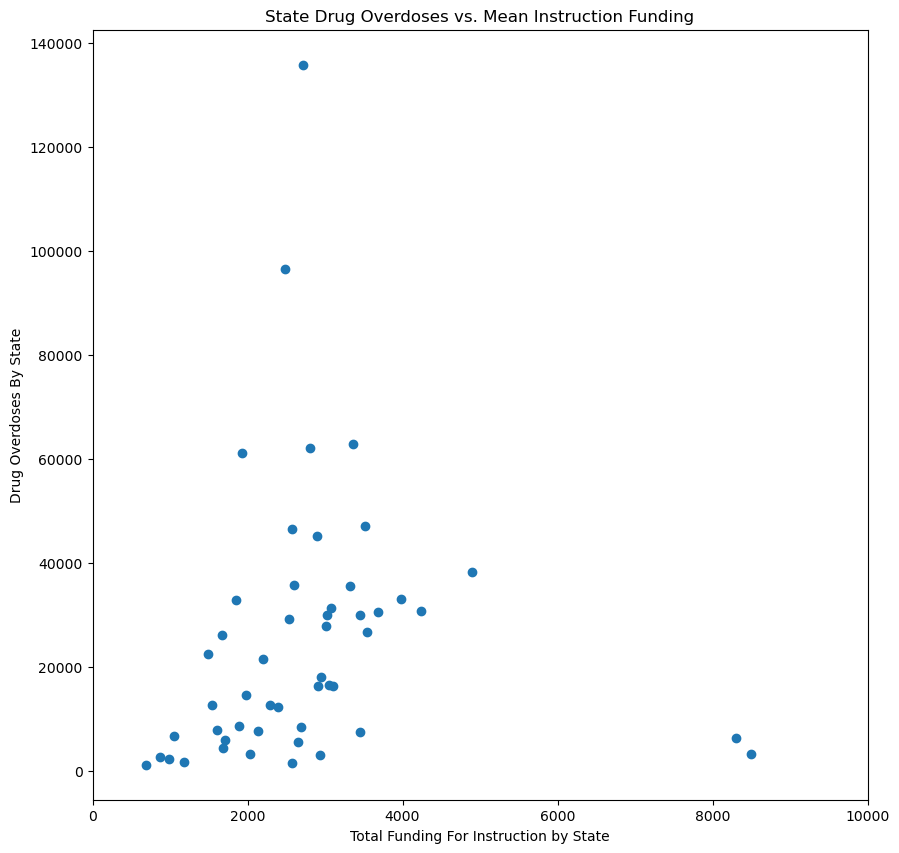

In [299]:
x = drugODvsmeanstatefunding['Mean Instruction Funding']
y = drugODvsmeanstatefunding['Drug Overdoses']
plt.figure(figsize=(10,10))
plot = plt.plot(x,y,'o')
plt.xlim(0,10000)
plt.title('State Drug Overdoses vs. Mean Instruction Funding')
plt.xlabel('Total Funding For Instruction by State')
plt.ylabel('Drug Overdoses By State')

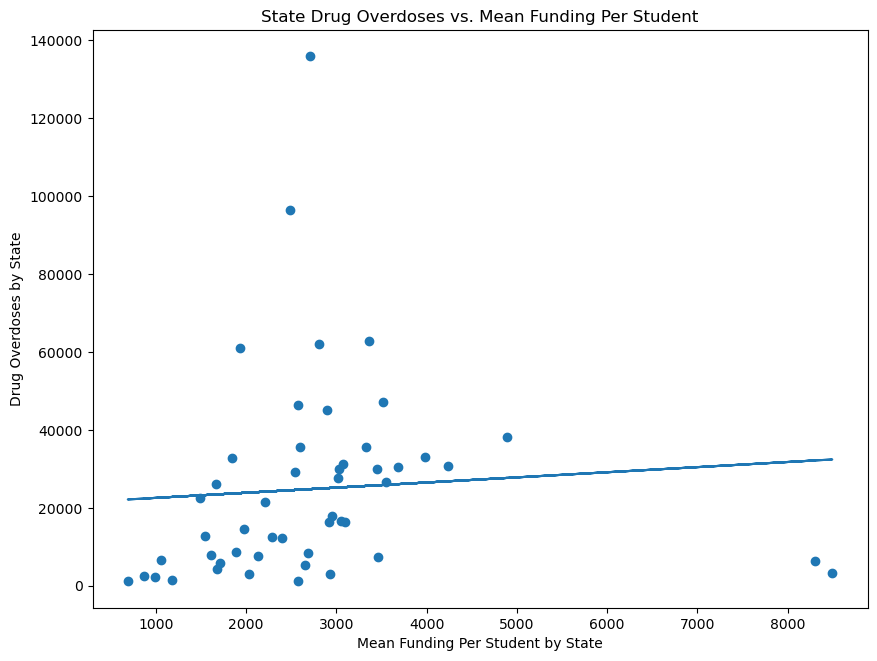

In [302]:
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10,7.5))
plt.scatter(x,y)

plt.plot(x,a*x+b)

plt.title('State Drug Overdoses vs. Mean Funding Per Student')
plt.xlabel('Mean Funding Per Student by State')
plt.ylabel('Drug Overdoses by State')
plt.savefig('Drug Overdoses vs. Mean Funding Per Student.png')


Text(0, 0.5, 'Drug Overdoses By State')

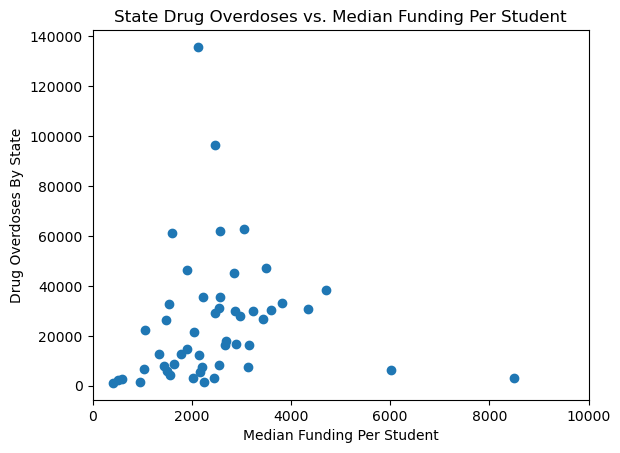

In [303]:
x = drugODvsmedianstatefunding['Median Instruction Funding']
y = drugODvsmedianstatefunding['Drug Overdoses']
plot = plt.plot(x,y,'o')
plt.xlim(0,10000)
plt.title('State Drug Overdoses vs. Median Funding Per Student')
plt.xlabel('Median Funding Per Student')
plt.ylabel('Drug Overdoses By State')

1.4938399256110282


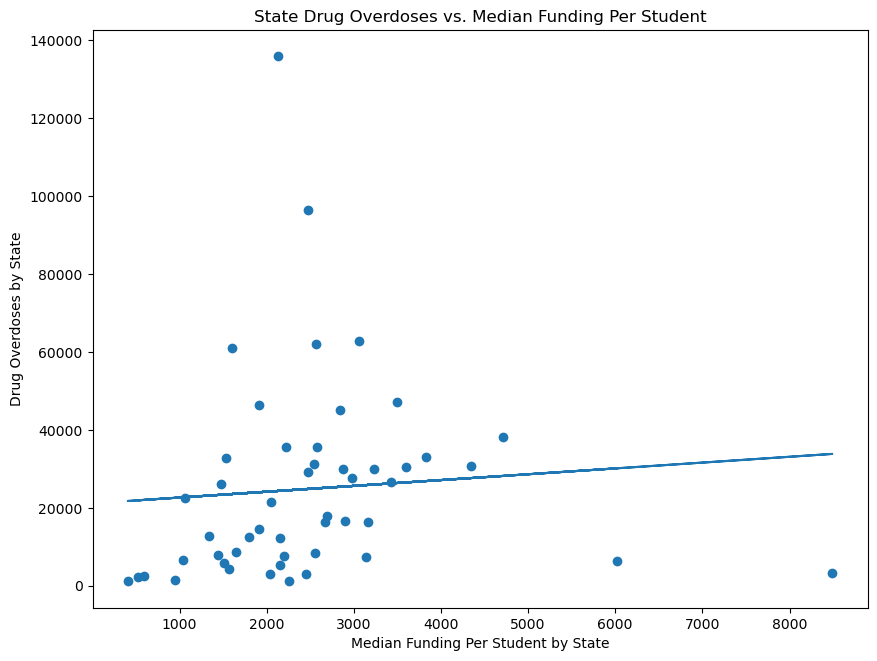

In [305]:
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10,7.5))
plt.scatter(x,y)

plt.plot(x,a*x+b)

plt.title('State Drug Overdoses vs. Median Funding Per Student')
plt.xlabel('Median Funding Per Student by State')
plt.ylabel('Drug Overdoses by State')
plt.savefig('Drug Overdoses vs. Median Funding Per Student.png')
print(a)

In [276]:
pearsonr = merged.corr(method='pearson',numeric_only= True)

print(pearsonr)

                                                level_0     index  \
level_0                                        1.000000  1.000000   
index                                          1.000000  1.000000   
(Spending For Instruction Per School, mean)   -0.202655 -0.202655   
(Spending For Instruction Per School, median) -0.153489 -0.153489   
(Spending For Instruction Per School, std)    -0.212618 -0.212618   
Unnamed: 0                                     0.999196  0.999196   
Year                                                NaN       NaN   
Data Value                                    -0.101224 -0.101224   

                                               (Spending For Instruction Per School, mean)  \
level_0                                                                          -0.202655   
index                                                                            -0.202655   
(Spending For Instruction Per School, mean)                                       1.000000   
(S